In [1]:
# use this cell to import, create table and Insert data

# Import sqllite
import sqlite3
with sqlite3.connect("BookInfo.db") as db:
    cursor = db.cursor()


# Create table Authors
cursor.execute("""
CREATE TABLE IF NOT EXISTS Authors(
Name TEXT PRIMARY KEY,
Pob TEXT NOT NULL);
""")

#Inserting values in Authors
cursor.execute(
     """INSERT INTO Authors(Name, Pob) VALUES("Agatha Christie", "Torquay")
    """)

cursor.execute(
     """INSERT INTO Authors(Name, Pob) VALUES("J.K. Rowling", "Bristol")
    """)

cursor.execute(
     """INSERT INTO Authors(Name, Pob) VALUES("Oscar Wilde", "Dublin")
    """)

# commiting
db.commit() 

# Create TABLE Books
cursor.execute("""
CREATE TABLE IF NOT EXISTS Books(
ID Integer PRIMARY KEY,
Title TEXT NOT NULL,
Author TEXT NOT NULL,
Data_Published Integer);
""")

#Inserting values in Authors
cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(1, "De Profundis", "Oscar Wilde", 1905)
    """)

cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(2, "Harry Potter and the chamber of secrets", "J.K. Rowling", 1998)
    """)

cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(3, "The seven dials mystery", "Agatha Christie", 1929)
    """)

cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(4, "The picture of Dorian Gray", "Oscar Wilde", 1890)
    """)

cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(5, "Murder on the Orient Express", "Agatha Christie", 1934)
    """)

cursor.execute(
     """INSERT INTO Books(ID, Title, Author, Data_Published) VALUES(6, "Harry Potter and the prisoner of Azkaban", "J.K. Rowling", 1999)
    """)

# commiting
db.commit() 


In [52]:
# JOIN

BirthPlace = input("Enter the palce of birth: ")

cursor.execute(""" SELECT * FROM Authors, Books WHERE Authors.Name = Books.Author And Authors.Pob = ?""", [BirthPlace])

for x in cursor.fetchall():
    print(x)


Enter the palce of birth:  Bristol


('J.K. Rowling', 'Bristol', 2, 'Harry Potter and the chamber of secrets', 'J.K. Rowling', 1998)
('J.K. Rowling', 'Bristol', 6, 'Harry Potter and the prisoner of Azkaban', 'J.K. Rowling', 1999)


In [48]:
# Select filter choice based on the user input with sorting

PublishedYear = int(input("Enter a year: "))

cursor.execute(""" SELECT Title FROM Books WHERE Data_Published > ? order by Data_Published """, [PublishedYear])

for x in cursor.fetchall():
    print(x)


Enter a year:  1920


('The seven dials mystery',)
('Murder on the Orient Express',)
('Harry Potter and the chamber of secrets',)
('Harry Potter and the prisoner of Azkaban',)


In [70]:
# Loading in a file from a Database. 
# In this case we had a particular format to display the data. If we don't have any format dire


import numpy as np
Author_name = input("Enter a Author's name: ")

# cursor.execute(""" SELECT Title FROM Books WHERE Author = ? """, [Author_name])
# Book_by_Authors = cursor.fetchall()

# np.savetxt('Booklist.txt',Book_by_Authors, fmt = "%s")

cursor.execute("""SELECT ID, Title, Author, Data_Published FROM Books WHERE Author = ?""", [Author_name])
Book_by_Authors = cursor.fetchall()

# Check if any books were found
if Book_by_Authors:
    with open("Booklist.txt", "w") as file:
        #file.write("This file contains the following record(s):\n")
        for record in Book_by_Authors:
            # Format: ID - Title - Author - DatePublished
            formatted_line = f"{record[0]} - {record[1]} - {record[2]} - {record[3]}\n"
            file.write(formatted_line)
    
    # Display the content of the file
    with open("Booklist.txt", "r") as file:
        print("\n" + file.read())
else:
    print(f"No books found for author {Author_name}.")

# db.close()

Enter a Author's name:  J.K. Rowling



2 - Harry Potter and the chamber of secrets - J.K. Rowling - 1998
6 - Harry Potter and the prisoner of Azkaban - J.K. Rowling - 1999



In [74]:
#Insert data on user's choice

newName = input("Enter name: ")
newPublishedDate = input("Enter Published Date: ")

cursor.execute("""INSERT INTO Authors(Name, Pob)  
  VALUES(?, ?)""", (newName, newPublishedDate)) 

db.commit()

Enter name:  Rithik
Enter Published Date:  1999


In [76]:
# Basic Select command to check the data 

cursor.execute("SELECT * FROM Authors")
print(cursor.fetchall())

[('Agatha Christie', 'Torquay'), ('J.K. Rowling', 'Bristol'), ('Oscar Wilde', 'Dublin'), ('Rithik', '1999')]


In [29]:
# Run this to get the table information

cursor.execute("PRAGMA table_info(Authors);")
print(cursor.fetchall())

[(0, 'Name', 'TEXT', 0, None, 1), (1, 'Pob', 'TEXT', 1, None, 0)]


In [ ]:



LET's Do a Phonebook Problem




In [5]:
import sqlite3

# Connect/Create database called PhoneBook
with sqlite3.connect("PhoneBook1.db") as db:
    cursor = db.cursor()

# Create a table called Names with four fields
cursor.execute("""CREATE TABLE IF NOT EXISTS Names(
    id integer PRIMARY KEY,
    firstname text,
    surname text,
    phonenumber text);""")

# Insert data into the table
cursor.execute("""INSERT INTO Names(id, firstname, surname, phonenumber)
VALUES ("60", "Simon", "Pierre", "0142678 9056")""")
db.commit()  # Saves the changes

# Insert data into the table Names
cursor.execute("""INSERT INTO Names(id, firstname, surname, phonenumber)
VALUES ("70", "Katarina", "Iglesias", "0203456 7078")""")
db.commit()  # Saves the changes

# Insert data into the table called Names
cursor.execute("""INSERT INTO Names(id, firstname, surname, phonenumber)
VALUES ("30", "Derrick", "Brown", "0122345 8765")""")
db.commit()  # Saves the changes

# Insert data into a table called Names
cursor.execute("""INSERT INTO Names(id, firstname, surname, phonenumber)
VALUES ("40", "John", "Smith", "0112653 2312")""")
db.commit()  # Saves the changes

# Insert data into a table called Names
cursor.execute("""INSERT INTO Names(id, firstname, surname, phonenumber)
VALUES ("50", "Mark", "Isaac", "0141657 1383")""")
db.commit()  # Saves the changes

#db.close()  # Close the database


OperationalError: table Names already exists

In [7]:
cursor.execute("SELECT * FROM Names")
print(cursor.fetchall())

[(30, 'Derrick', 'Brown', '0122345 8765'), (40, 'John', 'Smith', '0112653 2312'), (50, 'Mark', 'Isaac', '0141657 1383'), (60, 'Simon', 'Pierre', '0142678 9056'), (70, 'Katarina', 'Iglesias', '0203456 7078')]


In [13]:
# Menubook Problem


def viewphonebook():
    cursor.execute("SELECT * FROM Names")
    for x in cursor.fetchall():
        print(x)

def addtophonebook():
    newid = int(input("Enter ID: "))
    newfname = input("Enter first name: ")
    newsname = input("Enter surname: ")
    newpnum = input("Enter phone number: ")
    cursor.execute("""INSERT INTO Names (id,firstname,surname,phonenumber) 
    VALUES (?, ?, ?, ?)""", (newid, newfname, newsname, newpnum))
    db.commit()

def selectname():
    selectsurname = input("Enter a surname: ")
    cursor.execute("SELECT * FROM Names WHERE surname = ?", [selectsurname])
    for x in cursor.fetchall():
        print(x)

def deletedata():
    selectid = int(input("Enter ID: "))
    cursor.execute("DELETE FROM Names WHERE id = ?", [selectid])
    cursor.execute("SELECT * FROM Names")
    for x in cursor.fetchall():
        print(x)
    db.commit()

with sqlite3.connect("PhoneBook1.db") as db:
    cursor = db.cursor()

def main():
    again = "y"
    while again == "y":
        print()
        print("Main Menu")
        print()
        print("1) View phone book")
        print("2) Add to phone book")
        print("3) Search for surname")
        print("4) Delete person from phone book")
        print("5) Quit")
        print()
        selection = int(input("Enter your selection: "))
        print()

        if selection == 1:
            viewphonebook()
        elif selection == 2:
            addtophonebook()
        elif selection == 3:
            selectname()
        elif selection == 4:
            deletedata()
        elif selection == 5:
            again = "n"
        else:
            print("Incorrect selection entered")

main()
#db.close()



Main Menu

1) View phone book
2) Add to phone book
3) Search for surname
4) Delete person from phone book
5) Quit



Enter your selection:  2


Enter ID:  1
Enter first name:  Rithi
Enter surname:  S
Enter phone number:  8949017920



Main Menu

1) View phone book
2) Add to phone book
3) Search for surname
4) Delete person from phone book
5) Quit



Enter your selection:  4


Enter ID:  1


(30, 'Derrick', 'Brown', '0122345 8765')
(40, 'John', 'Smith', '0112653 2312')
(50, 'Mark', 'Isaac', '0141657 1383')
(60, 'Simon', 'Pierre', '0142678 9056')
(70, 'Katarina', 'Iglesias', '0203456 7078')

Main Menu

1) View phone book
2) Add to phone book
3) Search for surname
4) Delete person from phone book
5) Quit



Enter your selection:  5


In [ ]:


Shopping List problem



In [133]:
# Step1: Load the dataset
import pandas as pd
df = pd.read_csv('shopping.csv', parse_dates=['Date'],dayfirst = True) #,dayfirst = True

In [135]:
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Apples,10,0.5,NaN
1,2023-01-02,Bananas,5,0.2,NaN
2,2023-01-03,Oranges,8,0.6,NaN
3,2023-02-01,Apples,12,0.5,NaN
4,2023-02-05,Bananas,7,0.2,NaN
5,2023-03-10,Apples,6,0.5,NaN
6,2023-03-15,Bananas,9,0.2,NaN


In [137]:
# Nulls in the attributes
df.isnull().sum()

Date        0
Product     0
Quantity    0
Price       0
Total       7
dtype: int64

In [139]:
# To check non null (Similar to isnull)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7 non-null      datetime64[ns]
 1   Product   7 non-null      object        
 2   Quantity  7 non-null      int64         
 3   Price     7 non-null      float64       
 4   Total     0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 412.0+ bytes


In [141]:
#Clean the data by handling missing values. Giving Total a default value as 0
df.fillna({'Total':0}, inplace=True)

In [143]:
df

,Date,Product,Quantity,Price,Total
0,2023-01-01,Apples,10,0.5,0.0
1,2023-01-02,Bananas,5,0.2,0.0
2,2023-01-03,Oranges,8,0.6,0.0
3,2023-02-01,Apples,12,0.5,0.0
4,2023-02-05,Bananas,7,0.2,0.0
5,2023-03-10,Apples,6,0.5,0.0
6,2023-03-15,Bananas,9,0.2,0.0


In [157]:
#Calculate a new column (Total) based on the price and quantity.
df['Total'] = df['Quantity'] * df['Price']
df

,Date,Product,Quantity,Price,Total,Month
0,2023-01-01,Apples,10,0.5,5.0,2023-01
1,2023-01-02,Bananas,5,0.2,1.0,2023-01
2,2023-01-03,Oranges,8,0.6,4.8,2023-01
3,2023-02-01,Apples,12,0.5,6.0,2023-02
4,2023-02-05,Bananas,7,0.2,1.4,2023-02
5,2023-03-10,Apples,6,0.5,3.0,2023-03
6,2023-03-15,Bananas,9,0.2,1.8,2023-03


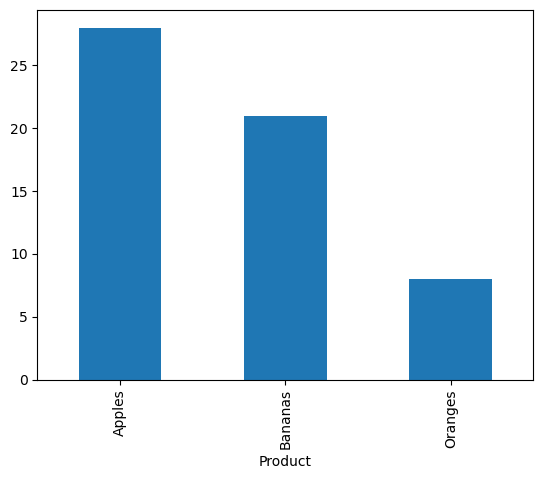

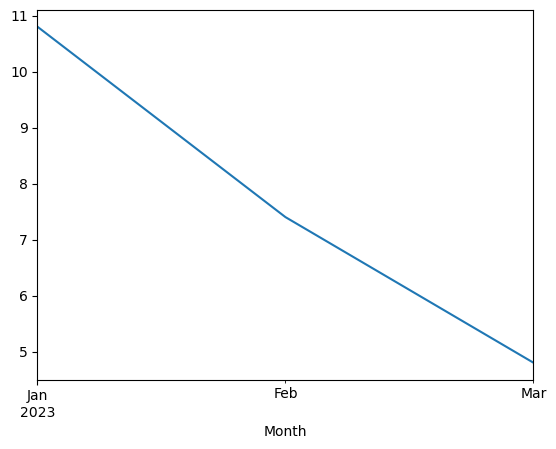

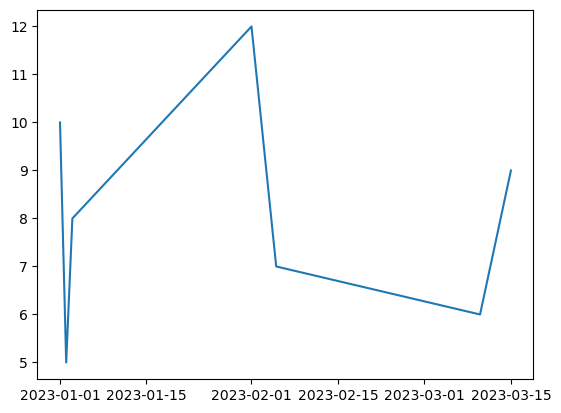

In [159]:
#Create a visualisation that shows the total sales per product using a bar chart.
import matplotlib.pyplot as plt
# product_total_sale = df['Quantity'].groupby(df['Product'])
# x = product_total_sale.sum()
product_total_sale = df.groupby('Product')['Quantity'].sum()
#x.plot(kind='barh')
product_total_sale.plot(kind='bar')
plt.savefig('shopping_bar.png')
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
#plt.title('Total sales over time')
#ggroup = df['Total'].groupby(df['Month'])
Monthly_sales = df.groupby('Month')['Total'].sum()
#x=ggroup.sum()
Monthly_sales.plot(kind='line')
plt.savefig('shopping_line.png')
plt.show()


x_date= df['Date']
y_quantity = df['Quantity']
plt.plot(x_date,y_quantity)
plt.show()


In [ ]:


Let's take a problem statement: Load shopping data in pandas and convert that into a table



In [35]:
# Step1: Load the dataset
import pandas as pd
df = pd.read_csv('shopping.csv', parse_dates=['Date'],dayfirst = True)

In [37]:
from sqlalchemy import create_engine

In [39]:
engine = create_engine('sqlite:///BookInfo.db')

In [41]:
df.to_sql('shopping', engine)

7

In [43]:
pd.read_sql('shopping', engine)

,index,Date,Product,Quantity,Price,Total
0,0,2023-01-01,Apples,10,0.5,NaN
1,1,2023-01-02,Bananas,5,0.2,NaN
2,2,2023-01-03,Oranges,8,0.6,NaN
3,3,2023-02-01,Apples,12,0.5,NaN
4,4,2023-02-05,Bananas,7,0.2,NaN
5,5,2023-03-10,Apples,6,0.5,NaN
6,6,2023-03-15,Bananas,9,0.2,NaN


In [53]:
import sqlite3
with sqlite3.connect("BookInfo.db") as db:
    cursor = db.cursor()

cursor.execute("SELECT * FROM shopping")
print(cursor.fetchall())

[(0, '2023-01-01 00:00:00.000000', 'Apples', 10, 0.5, None), (1, '2023-01-02 00:00:00.000000', 'Bananas', 5, 0.2, None), (2, '2023-01-03 00:00:00.000000', 'Oranges', 8, 0.6, None), (3, '2023-02-01 00:00:00.000000', 'Apples', 12, 0.5, None), (4, '2023-02-05 00:00:00.000000', 'Bananas', 7, 0.2, None), (5, '2023-03-10 00:00:00.000000', 'Apples', 6, 0.5, None), (6, '2023-03-15 00:00:00.000000', 'Bananas', 9, 0.2, None)]


In [ ]:
#Alter Table Command Syntax
cursor.execute("Alter table Books ADD Column Genre TEXT NOT NULL default A")

In [ ]:
#Update Column
cursor.execute("Update Books SET Genre = 'Programming' where Book_ID = 1")
cursor.execute("Update Books SET Genre = 'Data Science' where Book_ID = 2")

In [ ]:
# Delete from member on Phone number
cursor.execute("Delete From Members where Phone_Number = '8975743' ")

<Axes: >

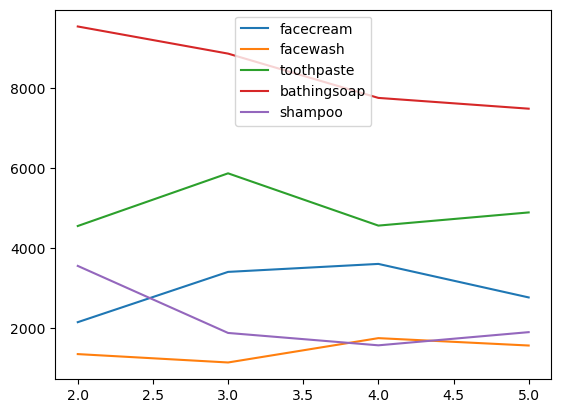

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('tAPP5_company_sales_data.csv')
df.iloc[2:6,1:6].plot()
#df[2:6,:].plot()
# a = df[
# a = df[df['month_number'].between(2,6)]
# a.plot()